# Exploratory Data Analysis (MVP version 1)

In [409]:
# Import the laibarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpat

# Step1: Exploring the data

In [ ]:
df = pd.read_csv('cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


> Find the correlation for all the datatframe

<ipython-input-472-12936cbee7f4>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correl, dtype = np.bool)


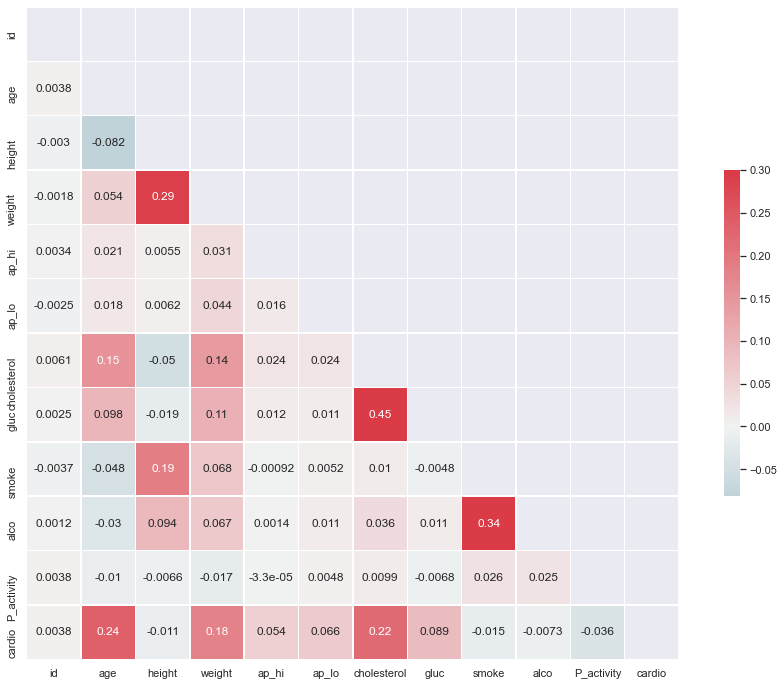

In [472]:
correl = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(correl, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (16, 12))

sns.heatmap(correl, mask = mask, cmap = cmap, vmax = 0.3, center = 0,annot = True, square = True, linewidths = 0.5, cbar_kws = {"shrink": .5});

# Step2: Clean the data 

### 1-Change the column name to make it clear 

In [ ]:
# ap_hi[Systolic_blood_pressure ]	ap_lo[Diastolic blood pressure ]	cholesterol	gluc[[Glucose]]	smoke	alco	active[Physical activity]	cardio [cardiovascular ]

df.rename(columns={'Systolic_blood_pressure': 'SB_pressure' , 'Diastolic blood pressure' : 'DB_pressure' , 'active':'P_activity'} ,inplace='True')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,P_activity,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 2-Replace the gender veiw :  number 1 with male & number 2 with female

In [ ]:
gender_dic= { 1: 'Male', 2: 'Female'}
df['gender']=df.gender.map(gender_dic)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,P_activity,cardio
0,0,18393,Female,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,Male,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,Male,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,Female,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,Male,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,Female,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,Male,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,Female,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,Male,163,72.0,135,80,1,2,0,0,0,1


### 3-Change the age (days) to age (years)

In [ ]:
df['age'] = df['age'] // 365
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,P_activity,cardio
0,0,50,Female,168,62.0,110,80,1,1,0,0,1,0
1,1,55,Male,156,85.0,140,90,3,1,0,0,1,1
2,2,51,Male,165,64.0,130,70,3,1,0,0,0,1
3,3,48,Female,169,82.0,150,100,1,1,0,0,1,1
4,4,47,Male,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,Female,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,Male,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,Female,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,Male,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.age.dtype

dtype('int64')

# Step3:  Answering the quistions

### 1-What is the most gender is exposed to be Cardiovascular Disease  ? 

<AxesSubplot:title={'center':'Distribution of Genders (Male, Female)'}, xlabel='Gender', ylabel='Number of Occurences'>

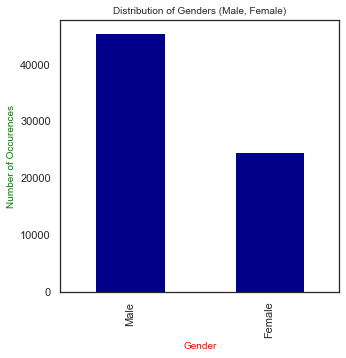

In [ ]:
# Gender Distribution
fig, ax = plt.subplots(figsize = (5,5))
ax.set_title('Distribution of Genders (Male, Female)', fontsize = 10 )
ax.set_xlabel("Gender", fontsize = 10 ,color="red")
ax.set_ylabel("Number of Occurences", fontsize = 10 , color="Green")
df["gender"].value_counts().plot(ax = ax, kind = "bar", color = "darkblue")


# plt.figure(figsize=(6,6));
# sns.countplot(x=df.gender.value_counts ,palette= df.cardio);
# plt.show()

In [ ]:
# This step to take all the 1's in cardio column, in each gender , and sum them all together
m_gender= df.groupby(['gender'] )[['cardio']].sum().sort_values(ascending = False , by ='cardio')
m_gender

,cardio
gender,
Male,22616
Female,12363


In [ ]:
#  I need to draw the result in pie chart and pie charet just take one dimetion so I will transfer my dataframe to ndarray bu using flatten method
one_d= m_gender.values.flatten()

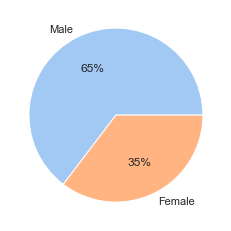

In [463]:
#  Time to draw the pie chart
colors = sns.color_palette('pastel')
labels =['Male' , 'Female'] # to know what the labels order print your 1D array first and see the column order 
plt.pie(one_d ,labels= labels , autopct='%.0f%%' , colors=colors)
plt.show()

### 2-Is there a relationship between smoking and getting Cardiovascular Disease?

In [ ]:
# # We will count all the injures either they smoke or not to see if smoking affect your heart health or not so we will use group by 
smoke_cardio = df.groupby(['smoke' , 'cardio'])[['cardio']].count()

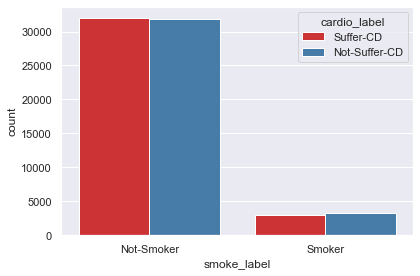

In [479]:
#  before draw I will change the hue order becouse i want the red color for the injures and so on...
Ckeys = {1:'Suffer-CD' , 0: 'Not-Suffer-CD'}
df['cardio_label'] = df['cardio'].replace(Ckeys)

# Dict to replace the 0 & 1 with text
Skeys = { 0: 'Not-Smoker', 1:'Smoker'}
df['smoke_label'] = df['smoke'].replace(Skeys)

# Draw using seaborn with countplot
sns.set_theme(style="darkgrid")
sns.countplot(x= "smoke_label" , hue= "cardio_label",  hue_order=['Suffer-CD','Not-Suffer-CD'],data= df , palette="Set1" );
plt.tight_layout()
plt.show()

### 3-Is there a relationship between age and getting Cardiovascular Disease?

In [ ]:
# groupby:  age and cardio and count how many injures people and not injure in each age
ages= df.groupby(['age' , 'cardio'])[['cardio']].count()
ages

cardio
age cardio        
29  0            3
30  0            1
39  0         1348
    1          432
40  0         1274
    1          348
41  0         1339
    1          564
42  0          994
    1          424
43  0         1287
    1          744
44  0          970
    1          544
45  0         1236
    1          851
46  0          986
    1          639
47  0         1138
    1         1059
48  0          985
    1          826
49  0         1968
    1         1449
50  0         1968
    1         1248
51  0         1775
    1         1593
52  0         1758
    1         1521
53  0         1918
    1         1950
54  0         1855
    1         1750
55  0         1755
    1         2172
56  0         1676
    1         1931
57  0         1594
    1         2092
58  0         1510
    1         1899
59  0         1377
    1         2199
60  0         1332
    1         1868
61  0          871
    1         1857
62  0          724
    1         1475
63  0          743
    1         1993
64  0          636
    1         1551

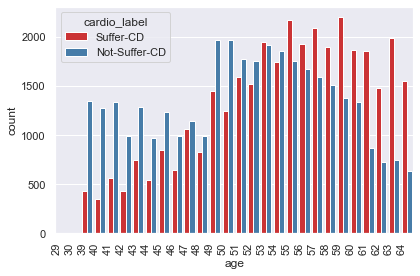

In [426]:
# Draw with seaborn
ax = sns.countplot(x= "age" , hue= "cardio_label" ,hue_order=['Suffer-CD','Not-Suffer-CD'], data= df , palette="Set1" );
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
plt.tight_layout()


### 4-what is the age that has the most patient number of Cardiovascular Disease?

In [477]:
# Find the age that have the high number of injuries
most = df.groupby(['age'] )[['cardio']].sum().sort_values(ascending = False , by ='cardio')
# if u need to call by column add -> as_index = false
most

,cardio
age,
59,2199
55,2172
57,2092
63,1993
53,1950
56,1931
58,1899
60,1868
61,1857


In [ ]:
# Bring the highest 5 ages with the highest number of injuries
most1= most.head()
most1= most1.reset_index()
most1

,age,cardio
0,59,2199
1,55,2172
2,57,2092
3,63,1993
4,53,1950


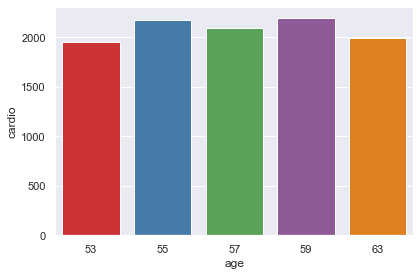

In [ ]:
# Draw with seaborn and use the variable that stored the 5 highest ages just
sns.set_theme(style="darkgrid")
ax = sns.barplot( x= 'age' , y='cardio',data= most1 , palette="Set1" );
# ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
plt.tight_layout()
plt.show()

### 5-Is their a relationship between doing physical activity and not having a Cardiovascular Disease?

In [ ]:
# Count how many injuries in each section( they do phiscal_act = 1 ,  they don't do phiscal_act = 0)
ages= df.groupby(['P_activity' , 'cardio'])[['cardio']].count()
ages

cardio
P_activity cardio        
0          0         6378
           1         7361
1          0        28643
           1        27618

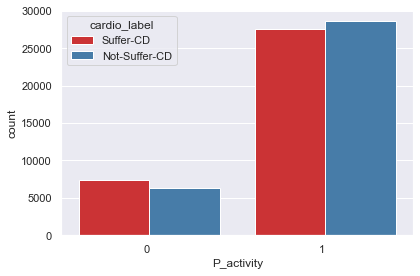

In [430]:
# Now let's see it visually
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= "P_activity" , hue= "cardio_label" ,hue_order=['Suffer-CD','Not-Suffer-CD'], data= df , palette="Set1" );
ax.set_xticklabels(ax.get_xticklabels(), ha="right");
plt.tight_layout()
plt.show()

### 6-Is there a relationship between being overweight and having Cardiovascular Disease?

In [503]:
# Take all weight that have CD = 1 (injuries)
most = df.groupby(['weight'])[['cardio']].sum()
most.reset_index()


,weight,cardio
0,10.0,1
1,11.0,1
2,21.0,1
3,22.0,0
4,23.0,0
...,...,...
282,178.0,1
283,180.0,4
284,181.0,1
285,183.0,1


In [504]:
most.weight = most.weight.astype(int)

AttributeError: 'DataFrame' object has no attribute 'weight'

In [490]:
# Draw with seaborn

# # sns.set_theme(style="white")
# plt.figure(figsize=[20,5])
# plt.bar(most.index,most.cardio , width=10)
# ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
# plt.tight_layout()
# plt.show()
# # g.fig.set_figwidth(8.27)
# # g.fig.set_figheight(11.7)

# sns.set_theme(style="white")
plt.figure(figsize=[20,5])
sns.countplot( x='weight' , hue='cardio' , data=most)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
plt.tight_layout()
plt.show()



ValueError: Could not interpret input 'weight'

<Figure size 1440x360 with 0 Axes>

In [389]:
most.index

Float64Index([ 10.0,  11.0,  21.0,  22.0,  23.0,  28.0,  29.0,  30.0,  31.0,
               32.0,
              ...
              170.0, 171.0, 172.0, 175.0, 177.0, 178.0, 180.0, 181.0, 183.0,
              200.0],
             dtype='float64', name='weight', length=287)

### 7- What is the dangerous weight that if you reach it you will cause yourself a Cardiovascular Disease?

In [480]:
# ..

### 8-How many cholesterol patients have a Cardiovascular and at what level they are?

In [376]:
# cholesterol_filter = df.groupby(['cholesterol'])[['cardio']].sum()
# cholesterol_filter

cholesterol_filter = df.groupby(['cholesterol' , 'cardio'])[['cardio']].count()
cholesterol_filter

cardio
cholesterol cardio        
1           0        29330
            1        23055
2           0         3799
            1         5750
3           0         1892
            1         6174

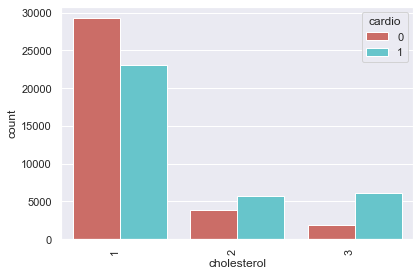

In [377]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= "cholesterol" , hue= "cardio" , data= df , palette="hls" );
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
plt.tight_layout()
plt.show()

# sns.histplot(data=df, x="cholesterol", hue="cardio", multiple="stack" )

In [474]:

# sns.heatmap(cholesterol_filter,annot=True,cmap="Spectral", linewidths=.5 );

In [379]:
cholesterol_filter_one= df.groupby(['cholesterol' , 'cardio'])[['cardio']].sum()
cholesterol_filter_one

cardio
cholesterol cardio        
1           0            0
            1        23055
2           0            0
            1         5750
3           0            0
            1         6174

In [380]:
one_d_cho = cholesterol_filter_one.values.flatten()
one_d_cho

array([    0, 23055,     0,  5750,     0,  6174], dtype=int64)

In [381]:
f_on = one_d_cho[one_d_cho!= 0]
f_on

array([23055,  5750,  6174], dtype=int64)

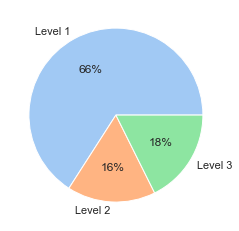

In [382]:
colors = sns.color_palette('pastel')
labels =['Level 1' , 'Level 2' ,'Level 3']
plt.pie(f_on ,labels= labels , autopct='%.0f%%' , colors=colors)
plt.show()

### 9- How many alcoholics are Cardiovascular Disease?

In [473]:
# df['alco'].corr(df ['cardio'])
# sns.scatterplot(data=df, x="alco", y='cardio',hue="cardio_label")

In [384]:
alcoholics = df.groupby(['alco' , 'cardio'])[['cardio']].count()
alcoholics

cardio
alco cardio        
0    0        33080
     1        33156
1    0         1941
     1         1823

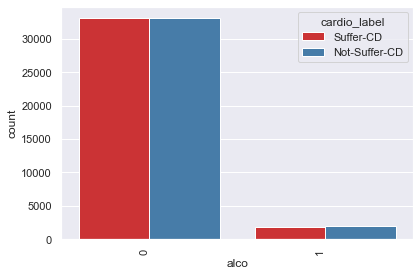

In [433]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= 'alco' , hue= "cardio_label", hue_order=['Suffer-CD','Not-Suffer-CD'] , data= df , palette="Set1" );
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
plt.tight_layout()
plt.show()

### 10- What is the most basic factor that causes infection by Cardiovascular Disease?

In [434]:
# ..